# **Email Spam Detection**

# **Problem Statement:**


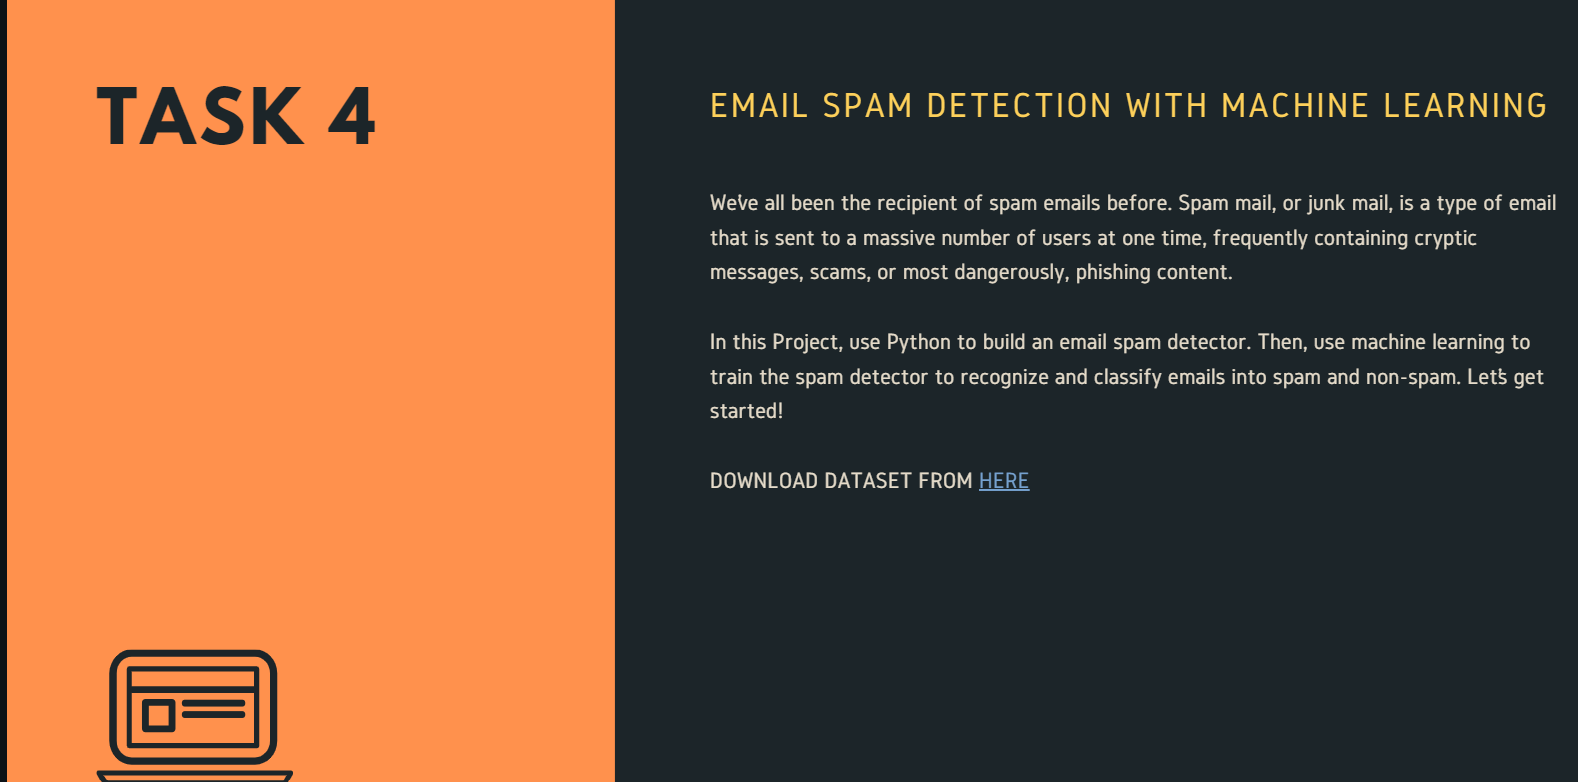

## Data Preparing

Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [5]:
# Loading the Dataset
df = pd.read_csv('/content/spam.csv',encoding='Latin')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
# Showing First 5 Rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# Showing Last 5 Rows
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
# Showing no. of rows and columns in the data
df.shape
# no of rows = 5171
# no. of columns = 4

(5572, 5)

In [9]:
# Showing columns of the dataset
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## Data Preprocessing

In [15]:
# Checking for Duplicated Values
df.duplicated().sum()

403

In [16]:
# Dropping duplicated values
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

In [12]:
# Showing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
# Showing Statistical summary of the data
df.describe(include='all')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5169,5169,43,10,5
unique,2,5169,43,10,5
top,ham,"Go until jurong point, crazy.. Available only ...",PO Box 5249,"MK17 92H. 450Ppw 16""","just Keep-in-touch\"" gdeve.."""
freq,4516,1,1,1,1


#Handling Null Values

In [18]:
# Checking for null values
df.isna().sum() # no null values

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

As (Unnammed : 2 , Unnammed : 3, Unnammed : 4) columns have more than 80 % null values and these columns are unnecessary columns so we are going to drop these columns.

#Dropping some Unnecessary Columns

In this Dataset Unnamed: 0 is unnecessary column which have no use in Analysis. So we will drop some unnecessary columns.

In [20]:
# Dropping columns
df.drop(df.iloc[:,2:], axis=1 , inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#Renaming the columns


In [21]:
# Renaming Column Names
df.columns = ['Category','Subject']

# checking for column names
df.columns

Index(['Category', 'Subject'], dtype='object')

In [22]:
# Showing Unique Values of Category column
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

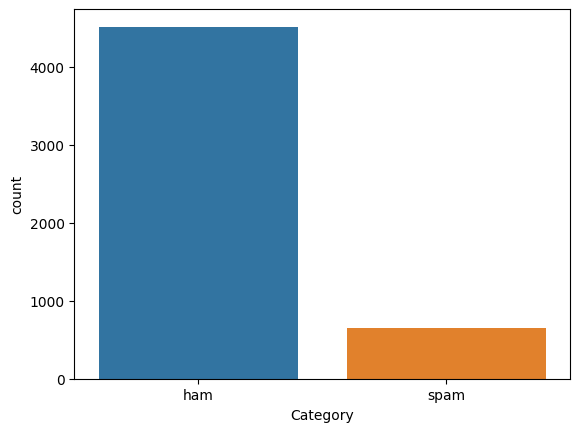

In [23]:
# Plotting Countplot for Category Column
sns.countplot(data = df , x = 'Category')
plt.show()

This Plot Clearly Shows that most of the mails are ham which means they are not spam mails.

After Dropping Duplicated Values the dataset have only 4993 rows and 2 columns left.

# Data Cleaning
1. Category Column

  a. ham indicates emails that are not spam

  b. spam indicates emails that are spam

So we have 2 types of category which are spam and ham so we can use logistic regression to classify whether emails are spam or not.

In [24]:
# labelling ham with 0 and spam with 1 for linear regression
df.loc[df['Category'] == 'spam', 'Category',] = 1
df.loc[df['Category'] == 'ham', 'Category',] = 0
df

,Category,Subject
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


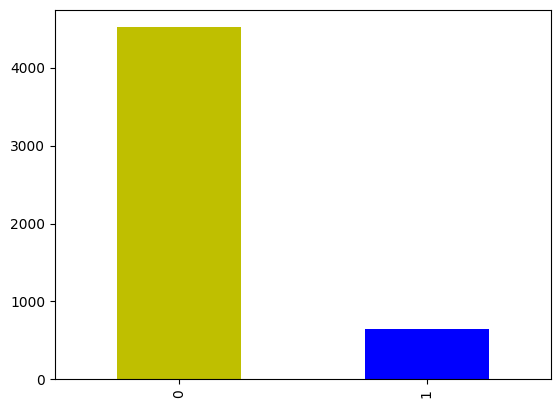

In [25]:
# Plotting barplot for Count of Category Column
df['Category'].value_counts().plot(kind='bar',color=('y','b'))
plt.show()

# **2. Subject Column**
Before Cleaning

In [26]:
# Showing some rows of Subject column
df['Subject'][[0,1,10,89,5569]]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
10      I'm gonna be home soon and i don't want to tal...
89              Ela kano.,il download, come wen ur free..
5569    Pity, * was in mood for that. So...any other s...
Name: Subject, dtype: object

Every Row of this Column has lower case and special characters in a data. So first we will convert the text into lower case and then we will clean the data by removing all these special characters.

For Removing this we use the RegexpTokenizer function from the Natural Language Toolkit (NLTK) library to tokenize the string using the regular expression pattern.

In [27]:
from nltk.tokenize import RegexpTokenizer

In [28]:
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    string = string.lower() #converting string into lowercase
    tokens = reg.tokenize(string) # tokenize the string on the defined pattern
    return " ".join(tokens) # joining the tokens with single space character and returning the output

In [30]:
# Applying lambda function for changing the data of 'Subject' Column
df['Subject'] = df['Subject'].apply(lambda string: clean_str(string))

After Cleaning

In [31]:
# Showing first row of Subject Column after cleaning
df['Subject'][0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

Checking the data after cleaning

In [32]:
# checking the data after cleaning
df.head()

,Category,Subject
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives arou...


# Separating the data as Category and Subject

In [33]:
X = df['Category']

Y = df['Subject']

In [34]:
print(X)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5169, dtype: object


In [35]:
print(Y)

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in a wkly comp to win fa cup final ...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the nd time we have tried contact u u ...
5568                    will b going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: Subject, Length: 5169, dtype: object


# Splitting the data into training data & test data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [37]:
X_train = X_train.astype('int')
X_test = X_test.astype('int')

In [38]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5169,)
(4135,)
(1034,)


# Feature Extraction

In [39]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

#min_df is tell the model that what is the minimum frequency for a word to consider.
#stop_words is a inbuilt function which is used to tell the model to remove the basic words like the, as, a, in etc.
#lowercase is used to lowercase all letters in the mail.

In [40]:
Y_train_featured = feature_extraction.fit_transform(Y_train)
Y_test_featured = feature_extraction.transform(Y_test)

In [41]:
print(Y_train)

3794          also remember the beads don t come off ever
4290                               call me when u re done
2603    im at arestaurant eating squid i will be out a...
3452    nowadays people are notixiquating the laxinorf...
3132                              so no messages had food
                              ...                        
5307                                what you did in leave
3455                           ok i ll do you right later
1708    how s my loverboy doing what does he do that k...
2730                            i havent lei next mon can
2871                                        see you there
Name: Subject, Length: 4135, dtype: object


In [42]:
print(Y_train_featured)
# Text is successfully converted into the numerical form

  (0, 1071)	0.3437338897223112
  (0, 1540)	0.37156393549300043
  (0, 482)	0.7040485582604493
  (0, 4571)	0.4980992697331587
  (2, 3017)	0.2824455176204198
  (2, 1552)	0.4452400742236678
  (2, 6141)	0.3039053333645621
  (2, 5279)	0.4452400742236678
  (2, 1646)	0.39799043104472387
  (2, 276)	0.4452400742236678
  (2, 2640)	0.2734109062225775
  (3, 2873)	0.23625416792839854
  (3, 3875)	0.20619375621964622
  (3, 6346)	0.23625416792839854
  (3, 344)	0.23625416792839854
  (3, 5657)	0.12635722937309635
  (3, 890)	0.23625416792839854
  (3, 1914)	0.23625416792839854
  (3, 183)	0.23625416792839854
  (3, 3343)	0.23625416792839854
  (3, 629)	0.2172881597767389
  (3, 5983)	0.21834714722886078
  (3, 3883)	0.23625416792839854
  (3, 3806)	0.23625416792839854
  (3, 1728)	0.23625416792839854
  :	:
  (4128, 5591)	0.30925735196477977
  (4129, 5399)	0.7292590805724172
  (4129, 1440)	0.5779264620427116
  (4129, 6143)	0.3663088831484532
  (4130, 1435)	0.6524232078420963
  (4130, 3052)	0.7578548395761742
  (41

#Logistic Regression

In [43]:
model = LogisticRegression()

In [44]:
# Training the Logistic Regression model
model.fit(Y_train_featured,X_train)

LogisticRegression()

Making a Prediction on Training Data and Checking the Accuracy of the Model

In [45]:
Prediction_on_train_data = model.predict(Y_train_featured)
accuracy_on_train_data = accuracy_score(X_train,Prediction_on_train_data)

In [46]:
print('Accuracy_on_train_data : ', accuracy_on_train_data*100)

Accuracy_on_train_data :  96.44498186215236


In [47]:
Prediction_on_test_data = model.predict(Y_test_featured)
accuracy_on_test_data = accuracy_score(X_test,Prediction_on_test_data)

In [48]:
print('Accuracy_on_test_data : ',accuracy_on_test_data*100)

Accuracy_on_test_data :  95.93810444874275


Hence the model is performing good.

# Building a Predictive System

1. The Mail is taken from the Dataset

In [49]:
Mail = ["Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."]
final_data = feature_extraction.transform(Mail)

final_prediction = model.predict(final_data)
if (final_prediction[0]==0):
  print("The mail is spam")
else:
  print("The mail is Ham(not spam)")

The mail is spam


2. Mail1 is user input Mail

In [50]:
Mail1 = [input("Paste the text of the mail here : ")]  # Taking user input
final_data1 = feature_extraction.transform(Mail1)

final_prediction1 = model.predict(final_data1)
print(final_prediction1)
if (final_prediction1[0]==0):
  print("The mail is spam")
else:
  print("The mail is Ham(not spam)")

Paste the text of the mail here : You are selected for Oasis Infobyte Internship Program 
[0]
The mail is spam
